In [170]:

Messdaten = [
    12.4, 12.5, 12.6, 12.4, 12.6, 12.7, 12.3,
    12.6, 12.7, 12.6, 12.5, 12.9, 12.5, 11.9,
    12.1, 12.0, 12.1, 12.3, 12.6, 12.4, 12.5,
    12.2, 12.4, 11.8, 12.1, 12.6, 12.5, 12.2,
    12.7, 12.6, 12.0, 12.3, 12.4, 12.3, 12.3,
    12.5, 12.5, 12.7, 12.6, 12.3, 12.2, 12.5,
    12.3, 12.4, 12.5, 12.5, 12.2, 12.8, 12.4,
    13.0, 12.4, 12.7, 12.4, 12.4, 12.9, 13.1]

**Aufgabe 1 Teil a**
* Aussehen der Verteilung in einem Histogram hängt von der Anzahl der "bins" ab, die gewählt werden 
* Ändern von __nof_bin__ auf andere Wert macht es dementsprechend ggf. schwieriger eine Normalverteilung zu erkennen 
* Statistische Tests sind daher besonders hilfreich um eine quantitative Aussage über die Verteilung von Messdaten zu tätigen 

Histogram der Messdaten als abs. Anzahl:


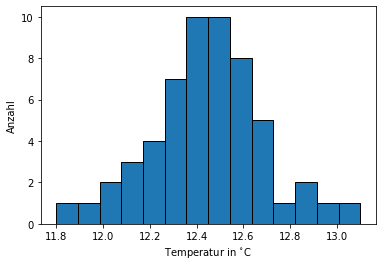

Histogram der Messdaten als prozentualer Anteil:


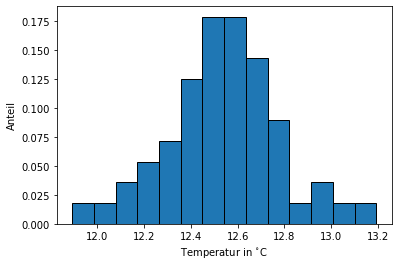

In [189]:
import matplotlib.pyplot as plt 
import numpy as np

nof_bin = 14

print("Histogram der Messdaten als abs. Anzahl:")
plt.hist(Messdaten, bins = nof_bin, edgecolor = 'black')
plt.ylabel('Anzahl')
plt.xlabel('Temperatur in ${\mathrm  {^{\circ }C}}$')
plt.show()

print("Histogram der Messdaten als prozentualer Anteil:")
Messdaten = np.asfarray(Messdaten)
hist, edges = np.histogram(Messdaten, bins = nof_bin)
freq = hist / float(hist.sum())
width = np.diff(edges) # edges is bins
plt.bar(edges[1:], freq, width=width, align="edge", ec="k")
plt.ylabel('Anteil')
plt.xlabel('Temperatur in ${\mathrm  {^{\circ }C}}$')
plt.show()



Statistischer Test: **Shapiro-Wilk Normality Test**<br>
* testet einen gegebenen Satz von Daten darauf, ob er normal (gauß) verteilt ist (Nullhypothese)<br>
* standardmäßig wird ein Signifikanzniveau (alpha-Wert) von 5% (0.05) gewählt
* wenn der p-Wert des Testes größer als das Signifikanzniveau ist, wird die Nullhypothese akzeptiert 

In [196]:
from scipy.stats import shapiro
from IPython.display import display, Markdown, Latex

stat, p = shapiro(Messdaten)
display(Markdown('p-Wert = %.3f' % (p)))
if p > 0.05:
	display(Markdown('Nullhypothese akzeptiert: Verteilung ist vermutlich normal verteilt'))
else:
	display(Markdown('Alternativhypothese akzeptiert: Verteilung ist vermutlich **nicht** normal verteilt'))

p-Wert = 0.491

Nullhypothese akzeptiert: Verteilung ist vermutlich normal verteilt

**Durchschnittlicher Fehler vs. Standardabweichung**
* Durchschnittlicher Fehler beinhaltet den absolut Wert: $$\overline{\Delta t} = \frac{1}{N} \sum_{i=1}^N |t_i - \bar{t}\,|$$ 
* Standardabweichung beinhaltet die quadrierten Differenzen: $$\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (t_i - \bar{t}\,)^2} $$

<br><br>
Die Standardabweichung bezieht insbesondere die Abweichung von Werten die weit vom Mittelwert entfernt sind mit ein. Ein Beispiel: <br>
Zwei verschiedene Datensätze von Notenpunkte einiger Studenten: $$S_1 = \{ 2, 2, 10, 10\}$$ $$S_2 = \{ 0, 4, 7, 13\}$$ 
* Die Streuung der Datenpunkte im ersten Satz $S_1$ ist niedriger als im zweiten Satz $S_2$
* Der Mittelwert von beiden Datensätzen ist µ = 6 
Wenn wir nun den durschnittlichen Fehler beider Datensätze berechnen erhalten wir: 
$$\overline{\Delta S_1} = \frac{1}{N} \sum_{i=1}^N |s_{i,1} - \bar{s_1}\,| = \frac{1}{4}\cdot (|2-6|+|2-6|+|10-6|+|10-6|) = 4$$
$$\overline{\Delta S_2} = \frac{1}{N} \sum_{i=1}^N |s_{i,2} - \bar{s_2}\,| = \frac{1}{4}\cdot (|0-6|+|4-6|+|7-6|+|13-6|) = 4$$
Obwohl die Abweichungen unter einander in $S_2$ größer sind, zeigen beide Datensätze den selben durchschnittlichen Fehler!
Bei der Standardabweichung hingegen erhalten wir: 
$$\sigma_{S1} = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (s_{i,1} - \bar{s_1}\,)^2} = \sqrt{\frac{1}{3}\cdot ((2-6)^2+(2-6)^2+(10-6)^2+(10-6)^2)} = 4.62 $$
$$\sigma_{S2} = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (s_{i,2} - \bar{s_2}\,)^2} = \sqrt{\frac{1}{3}\cdot ((0-6)^2+(4-6)^2+(7-6)^2+(13-6)^2)} = 5.48 $$
**In disem Fall sind die beiden Standardabweichungen unterschiedlich und der Wert für $S_2$ ist größer. Daher eignet sich die Standardabweichung im Allgemeinen besser um Streuung von Messdaten anzugeben!**

**Wie verhält sich die Normalverteilung?**
Rumspielen erwünscht!
<br>
* der Mean µ verschiebt den Mittelwert der Normalverteilung (grau gepunktete Linie, 
bei Datenmessungen soll dieser Wert möglichst nah an dem wahren Wert der Messung liegen => Korrektheit)
* die Standardabweichung σ beschreibt die Breite der Verteilung
* die 1σ Umgebung beinhält 68% aller Daten (rot gestrichelte Linien begrenzen diesen Bereich)
* je größer σ desto größer ist das Werteintervall in dem sich der Großteil aller Daten befindet => die Messung ist ungenauer 

In [187]:
import ipywidgets as widgets
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def normal_distribution(mean, sigma):
    fig, ax = plt.subplots()
    x = np.linspace(-10+mean,10+mean,200)
    data = norm.pdf(x, loc=mean, scale=sigma)
    ax.plot(x, data)
    ax.vlines(-sigma+mean, colors='red', linestyles='dashed' ,ymin=0, ymax=max(data))
    ax.vlines(sigma+mean, colors='red', linestyles='dashed',ymin=0, ymax=max(data))
    ax.axvspan(-sigma+mean, sigma+mean, alpha=0.2, color='red')
    xabs_max = abs(max(ax.get_xlim(), key=abs))
    ax.set_xlim(xmin=-xabs_max, xmax=xabs_max)
    ax.vlines(mean, colors='gray', linestyles='dotted' ,ymin=0, ymax=max(data))
    ax.set_xlabel()
    plt.tight_layout()
    plt.show()


w = widgets.interactive(normal_distribution, mean=widgets.IntSlider(value=0,min=0,max=3,step=1,continuous_update=True, description='µ'), 
                    sigma=widgets.IntSlider(value=1,min=1,max=7,step=1,continuous_update=True,  description='σ'))
display(w)


interactive(children=(IntSlider(value=0, description='µ', max=3), IntSlider(value=1, description='σ ', max=7, …

**Gesetz der großen Zahlen**
* relative Häufigkeit eines Zufallswertes stabilisiert sich um den theoretisch zu erwartenen Wert wenn eine Messung immer wieder unter identischen Bedingungen durchgeführt wird 
* Erhöhung der Anzahl der Datenpunkte lässt hier erkennen, das die theoretische Messung eine Normalverteilung abbildet 
* dies ist unabhängig von µ oder σ
* bei geringer Anzahl der Datenpunkte können "beliebige" Verteilungen erkannt werden 

In [188]:
def pull_values_from_normal_distribution(mean, sigma, nof):
    fig, ax = plt.subplots()
    r = norm.rvs(loc=mean, scale=sigma, size=nof)
    ax.hist(r, bins=10)
    ax.set_xlim((-5+mean-sigma,5+mean+sigma))
    
    # x = np.linspace(-5+mean-sigma,5+mean+sigma,200)
    # data = norm.pdf(x, loc=mean, scale=sigma)
    # ax.plot(x, data)
    plt.tight_layout()
    plt.show()


w = widgets.interactive(pull_values_from_normal_distribution, mean=widgets.IntSlider(value=0,min=0,max=3,step=1,continuous_update=True, description='µ'), 
                    sigma=widgets.IntSlider(value=1,min=1,max=3,step=1,continuous_update=True, description='σ'),
                    nof=widgets.IntSlider(value=2,min=2,max=200,step=5,continuous_update=True, 
                                          description='Anzahl der Datenpunkte',layout=widgets.Layout(width='40%'),
                                          style= {'description_width': 'initial'}))
display(w)

interactive(children=(IntSlider(value=0, description='µ', max=3), IntSlider(value=1, description='σ', max=3, m…